<a href="https://colab.research.google.com/github/MondherFarjallah/Shopping_Trends/blob/main/Customer_Shopping_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [8]:
df = pd.read_csv(r"shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3877,3878,28,Female,Hoodie,Clothing,96,Nevada,M,Olive,Spring,4.20,No,Next Day Air,No,No,46,Debit Card,Monthly
669,670,43,Male,Jacket,Outerwear,89,Illinois,M,Gray,Spring,3.30,Yes,Free Shipping,Yes,Yes,45,Venmo,Bi-Weekly
920,921,37,Male,Belt,Accessories,81,Arkansas,XL,Gold,Summer,4.30,Yes,Free Shipping,Yes,Yes,37,Cash,Weekly
1476,1477,39,Male,Hat,Accessories,56,Wyoming,M,Magenta,Fall,4.10,No,Next Day Air,Yes,Yes,18,Credit Card,Monthly
3526,3527,20,Female,Sweater,Clothing,99,Massachusetts,M,Olive,Spring,3.80,No,Express,No,No,1,PayPal,Every 3 Months


Checking the shape of the Dataset

In [9]:
df.shape

(3900, 18)

Checking the number of Columns in the Dataset

In [10]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Information about the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [13]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


Checking if there are any null values present in the dataset

In [14]:
df.isnull().sum()


,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Checking if there are any duplicate values present in the dataset

In [15]:
df.duplicated().sum()

np.int64(0)

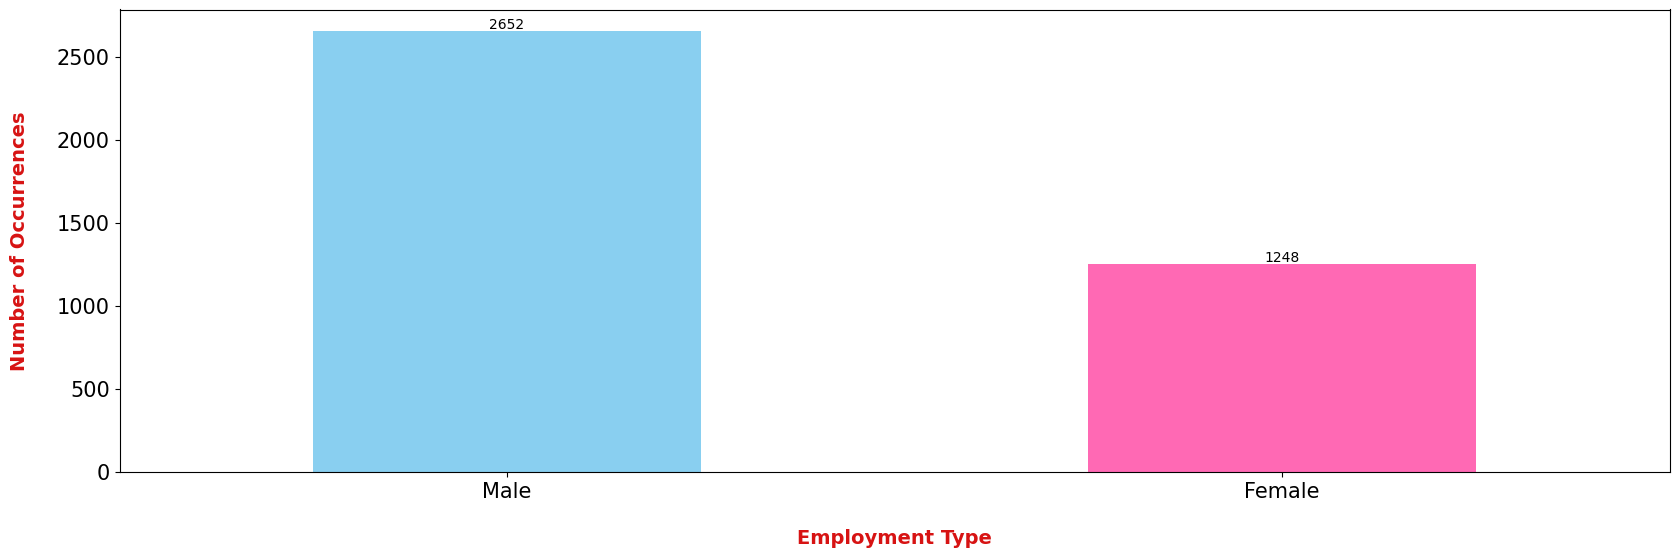

In [16]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);


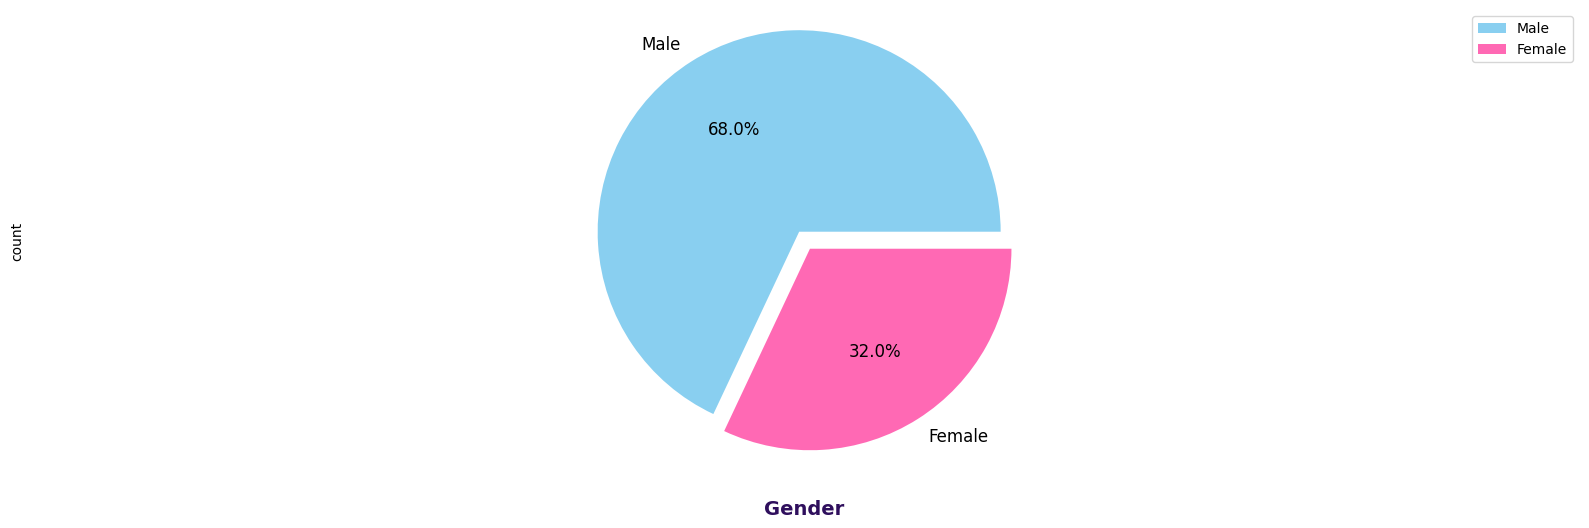

In [17]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Age Distribution with Density Curve

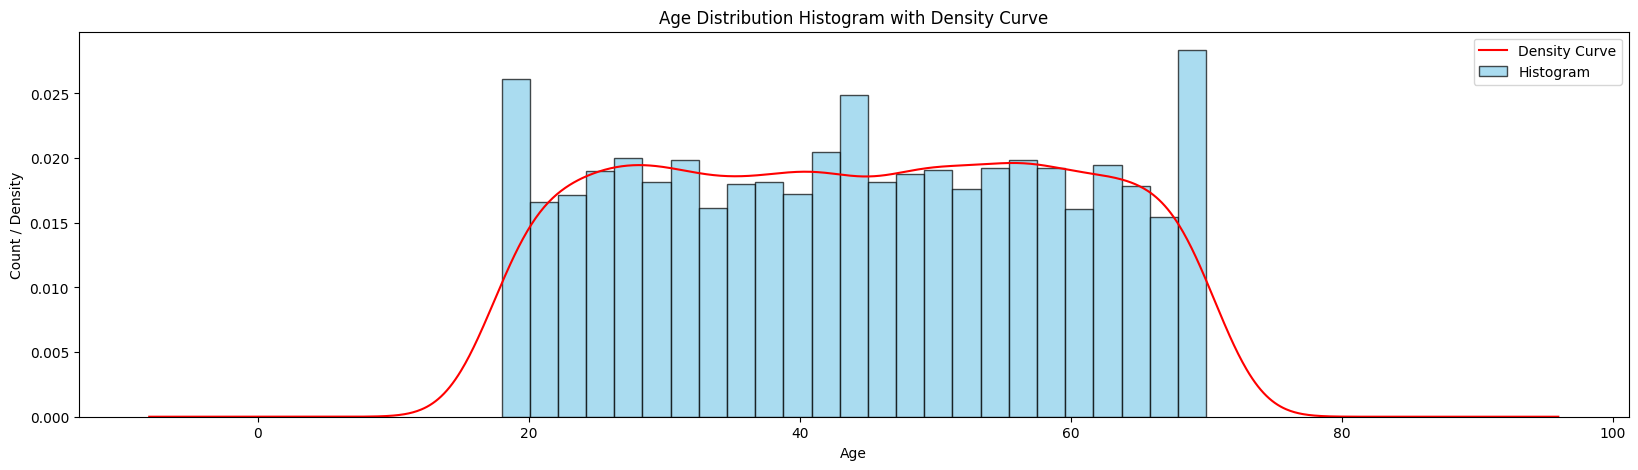

In [18]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()


In [19]:
df["Category"].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


Number of Occurrences for each category

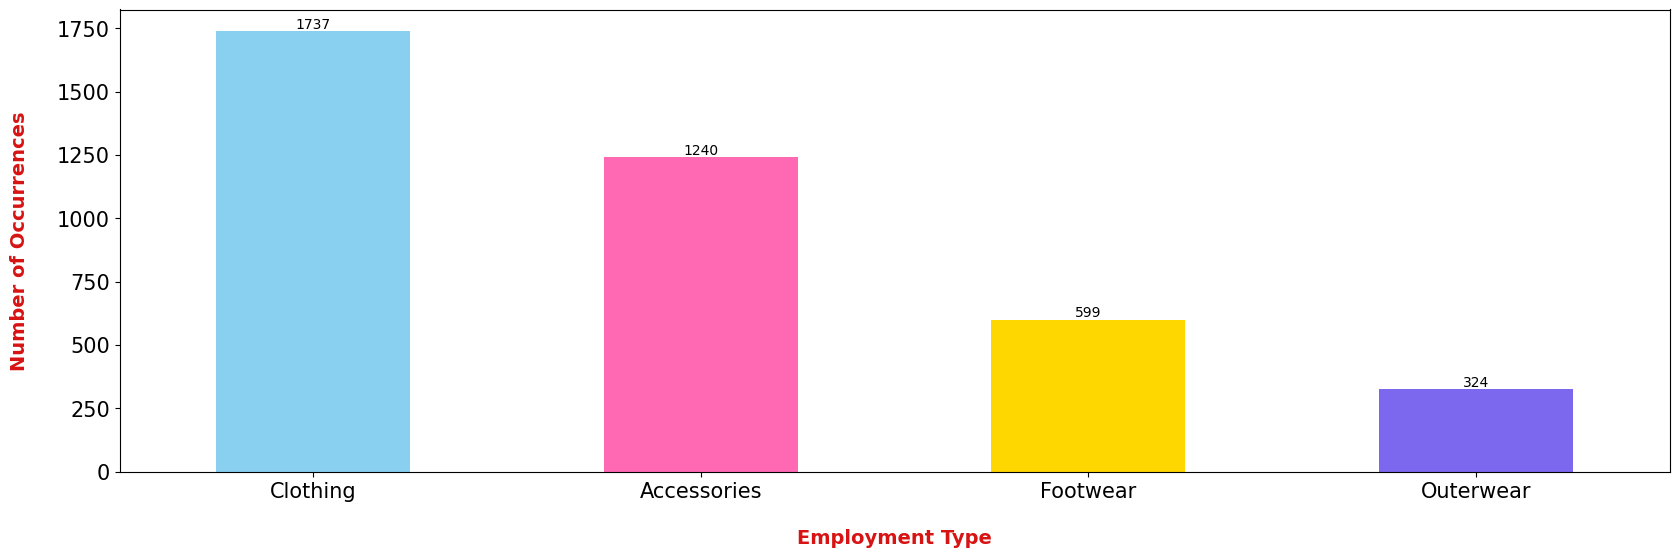

In [20]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

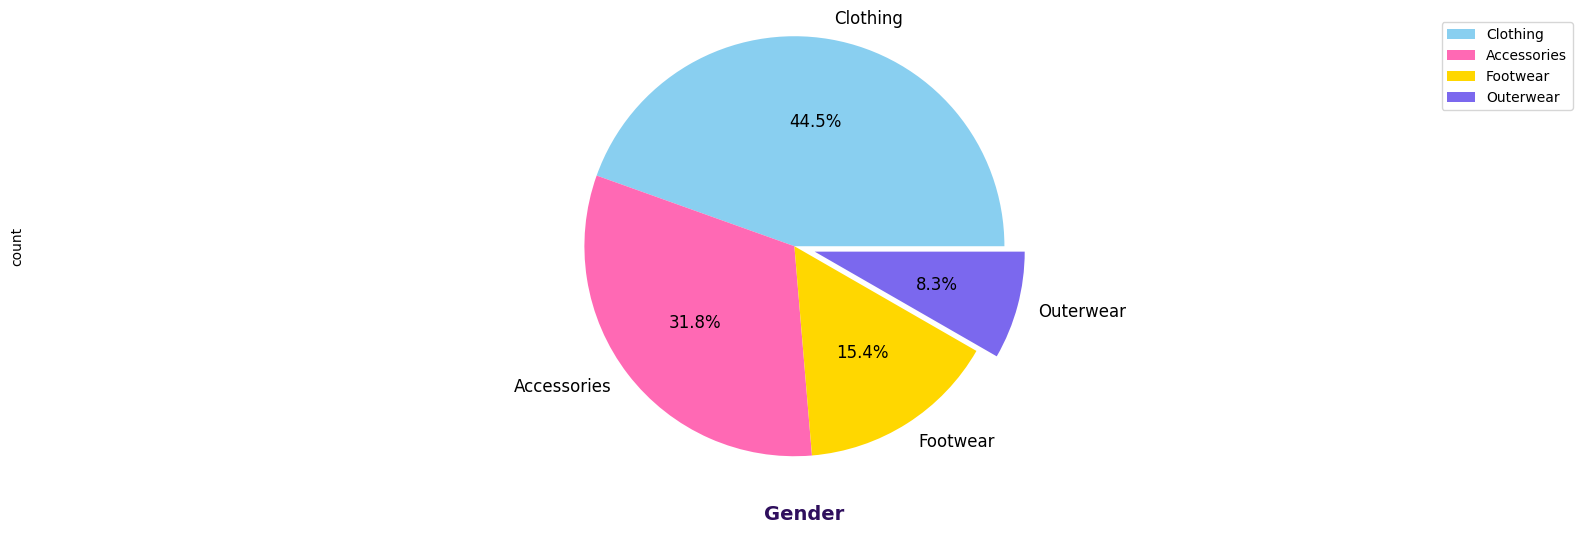

In [21]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [22]:
df["Item Purchased"].value_counts()

,count
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


Item Purchased & Number of Occurrences

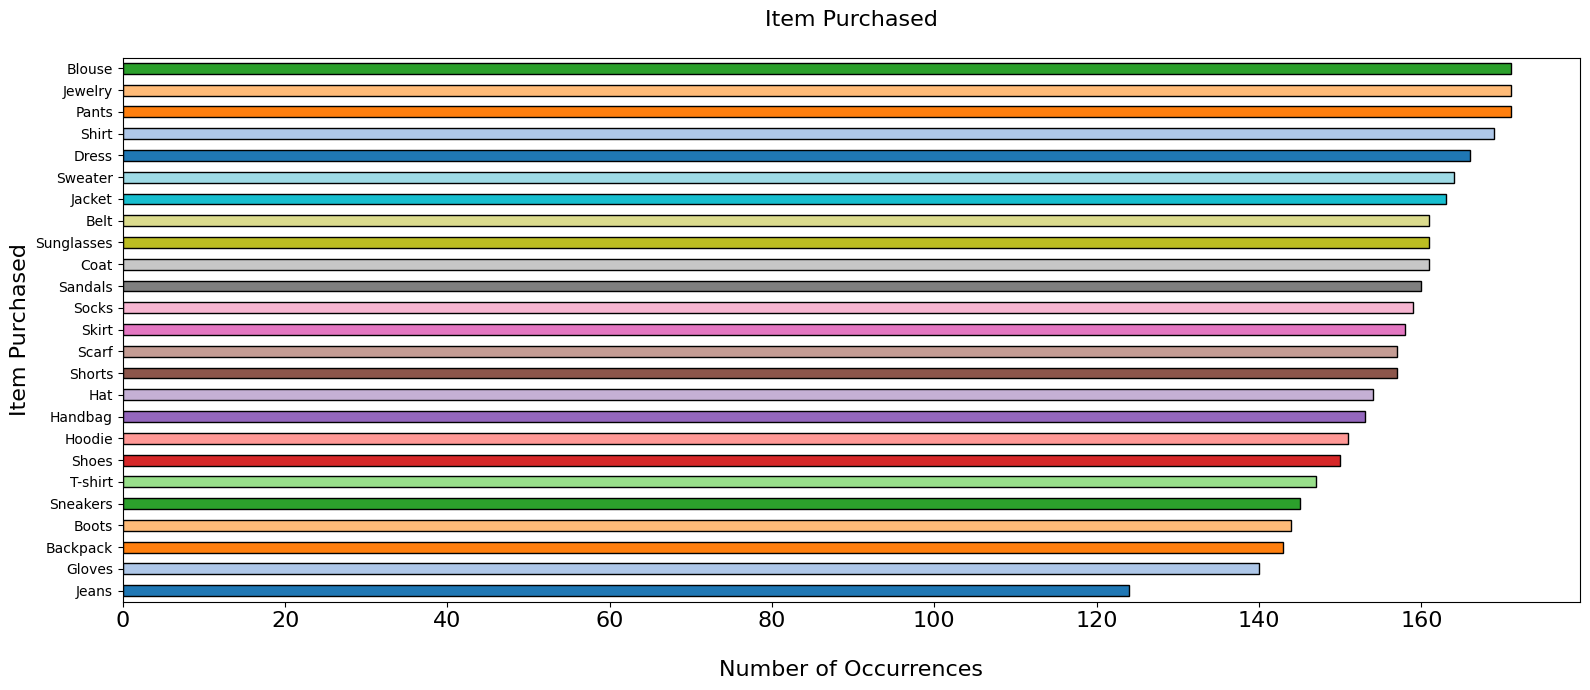

In [23]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

Number of Occurrences by size

In [24]:
df["Size"].value_counts()

,count
Size,
M,1755
L,1053
S,663
XL,429


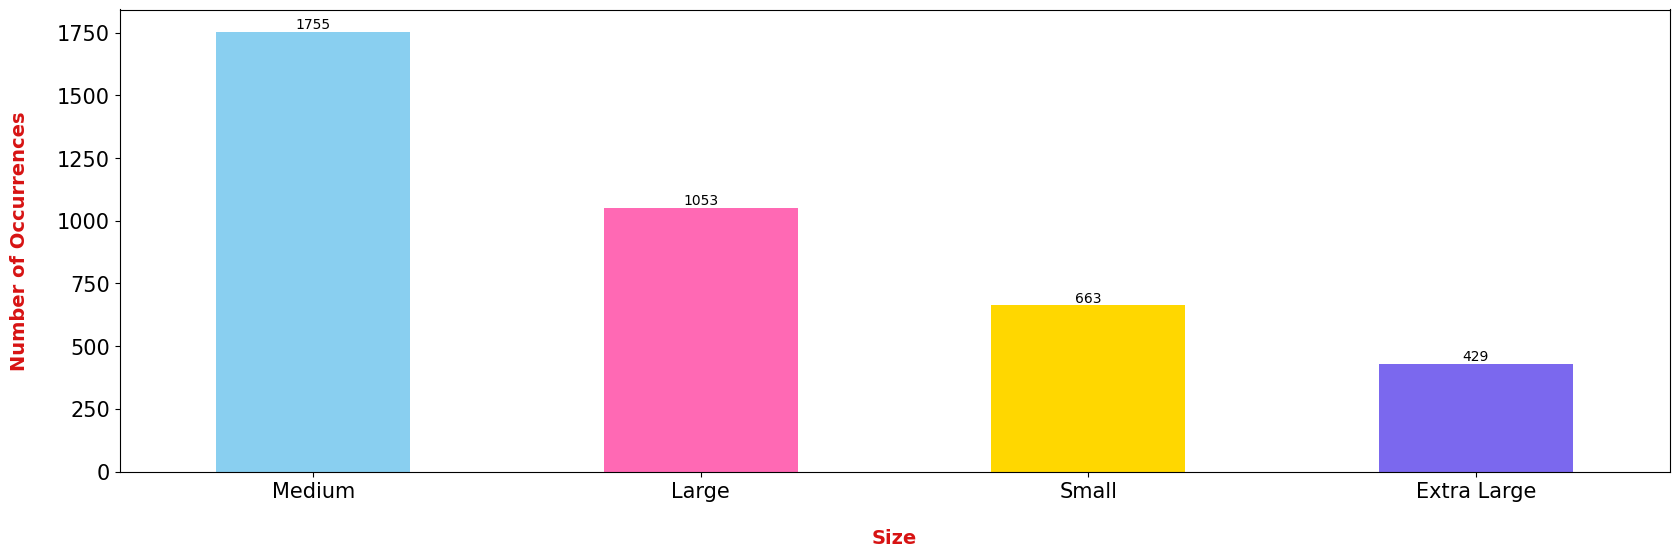

In [25]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

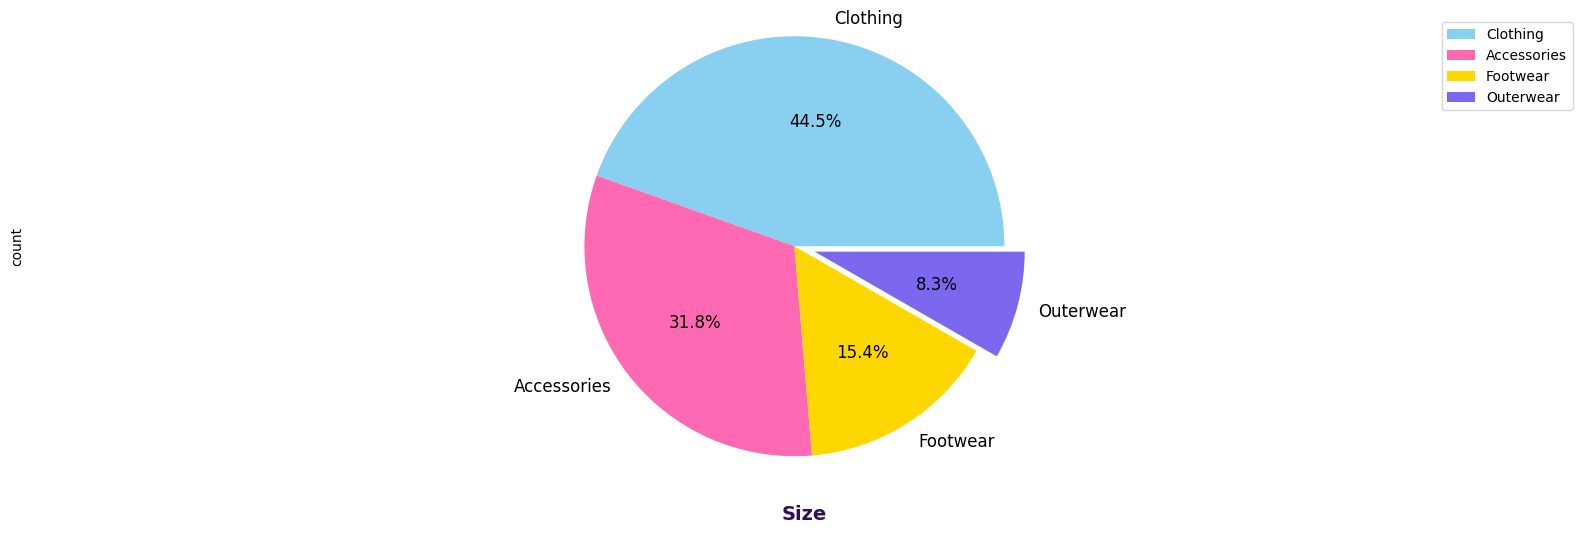

In [26]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Number of Occurrences by color

In [27]:
df["Color"].value_counts()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


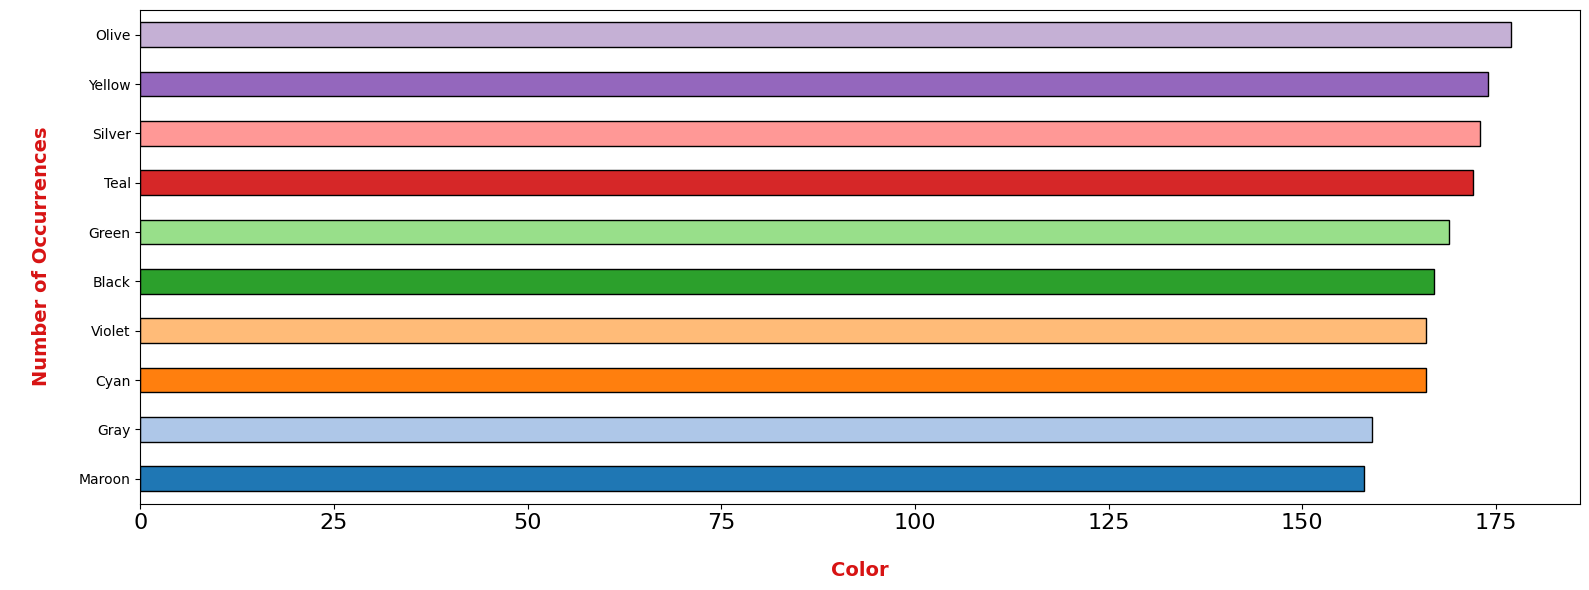

In [28]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

Number of Occurrences by season

In [29]:
df["Season"].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


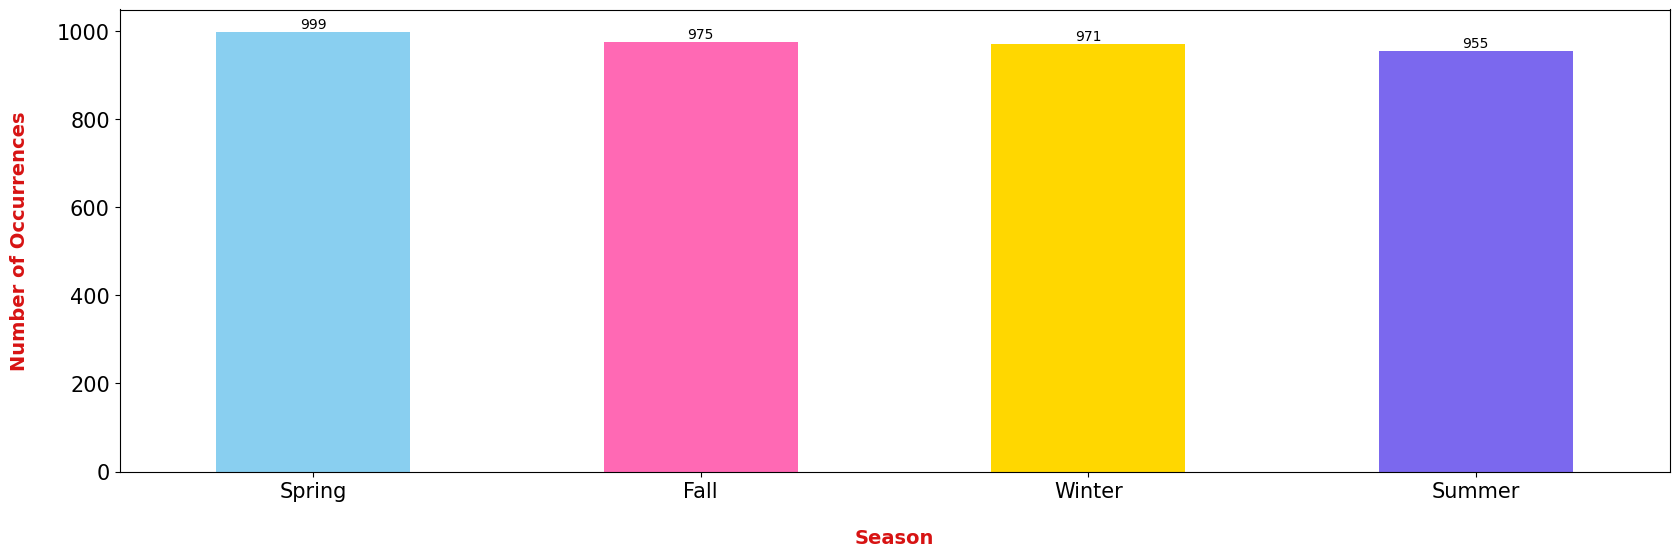

In [30]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

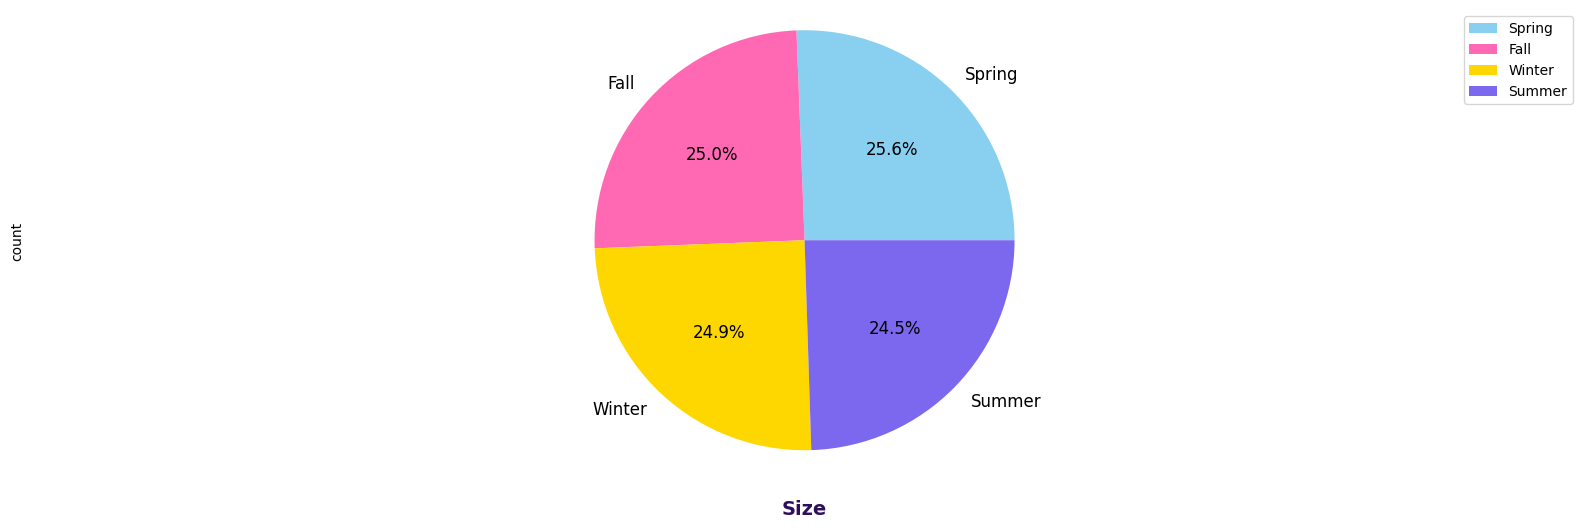

In [31]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Subscription Status

In [32]:
df["Subscription Status"].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


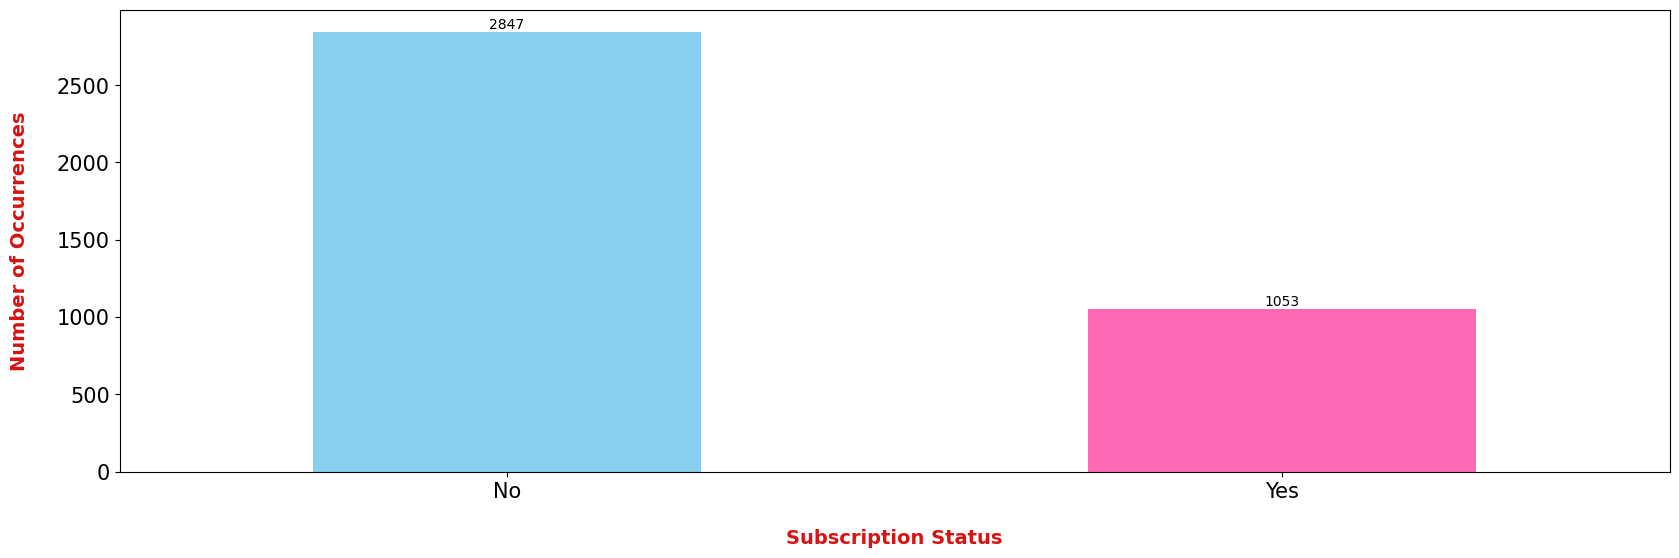

In [33]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

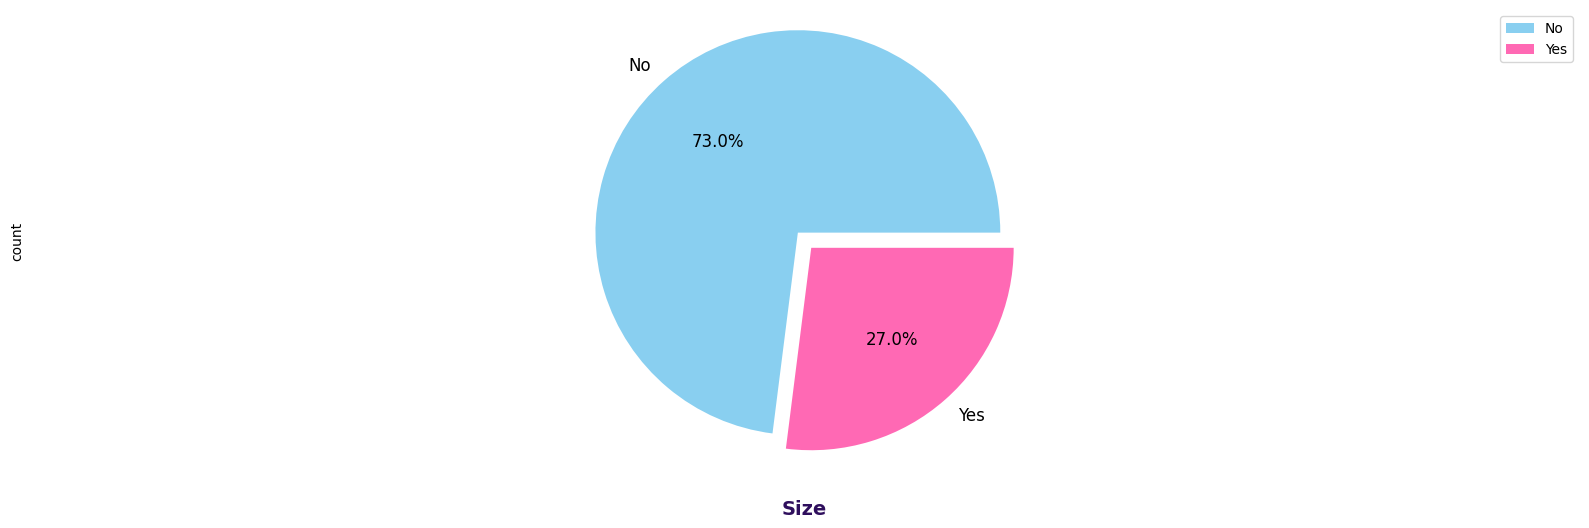

In [34]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Payment Methods

In [35]:
df["Payment Method"].value_counts()

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


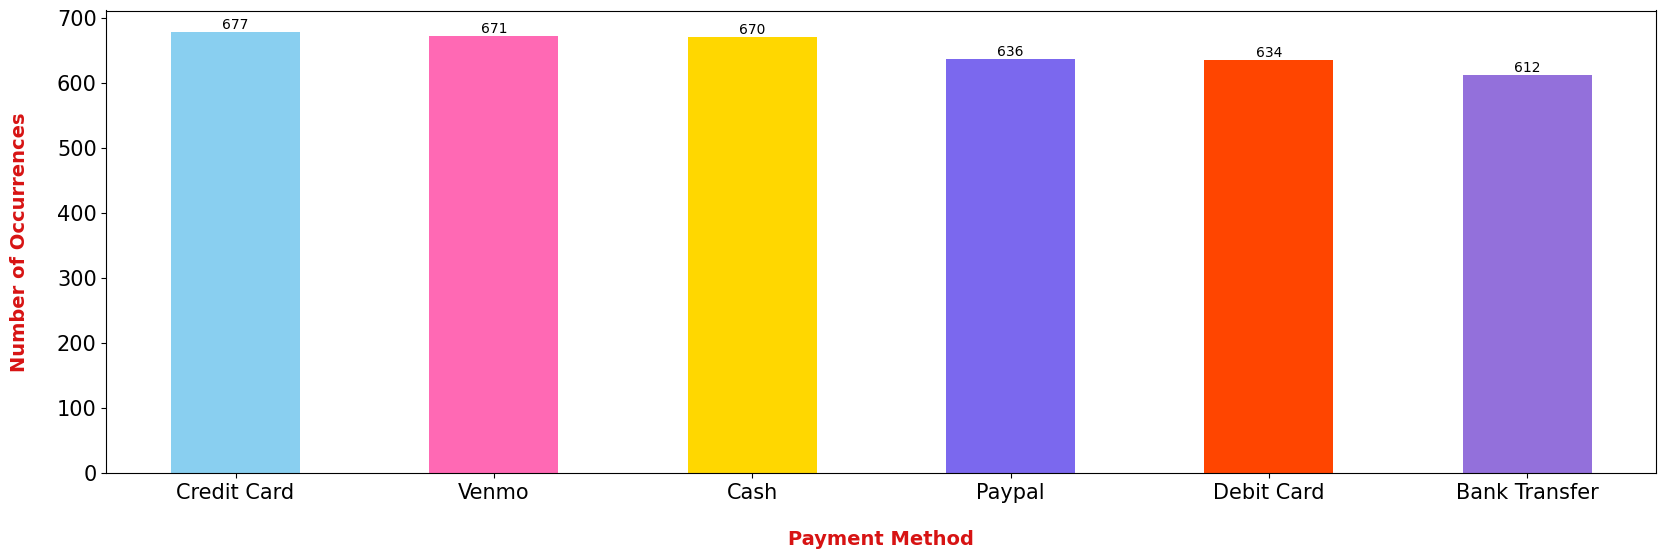

In [36]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

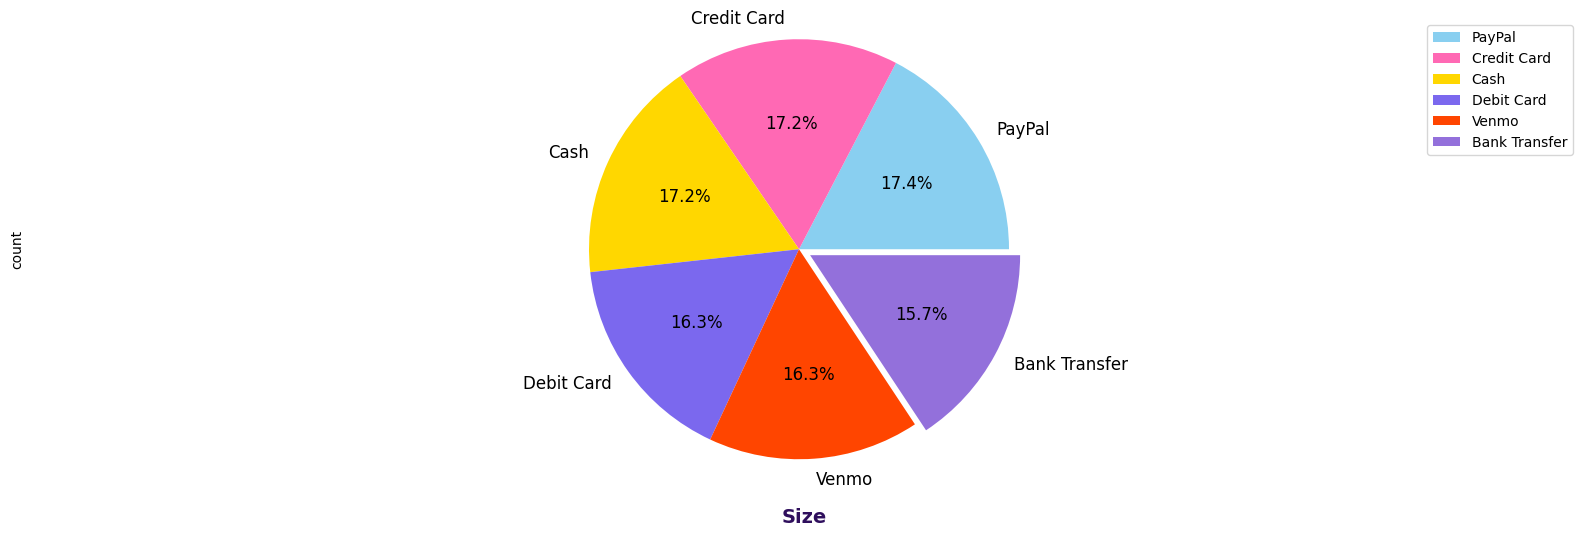

In [37]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Shipping Types

In [38]:
df["Shipping Type"].value_counts()

,count
Shipping Type,
Free Shipping,675
Standard,654
Store Pickup,650
Next Day Air,648
Express,646
2-Day Shipping,627


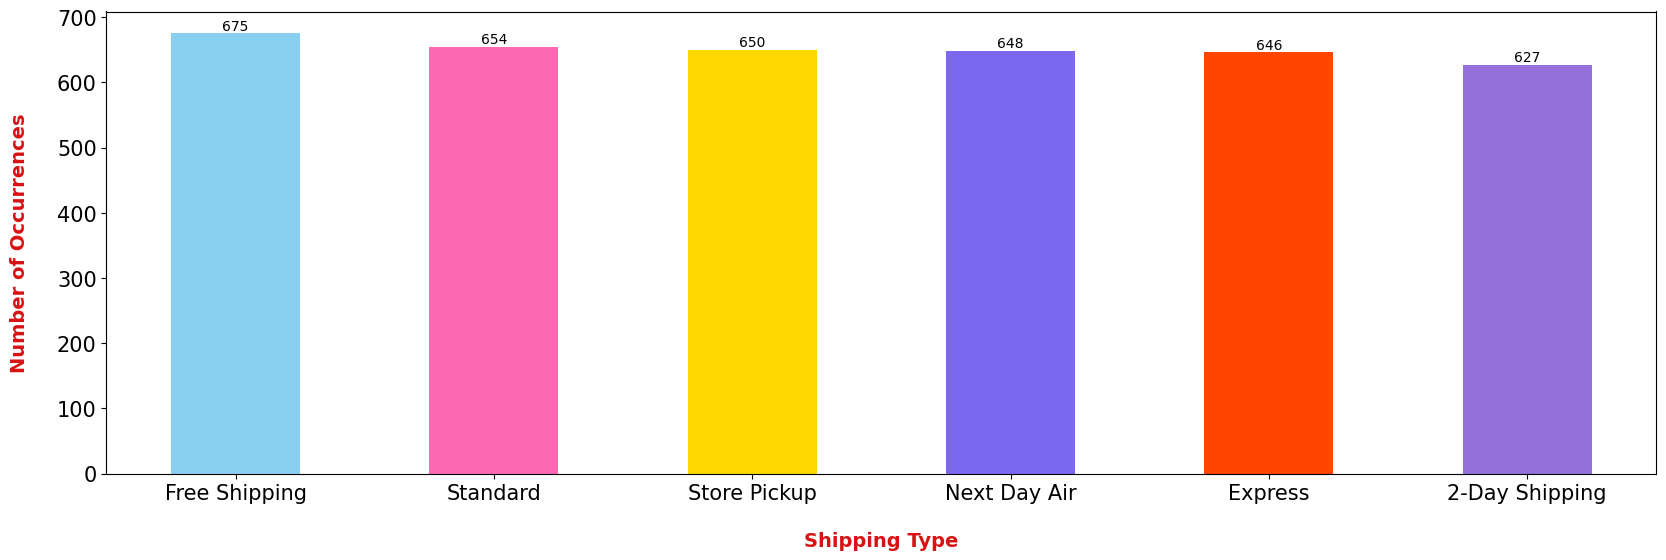

In [39]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

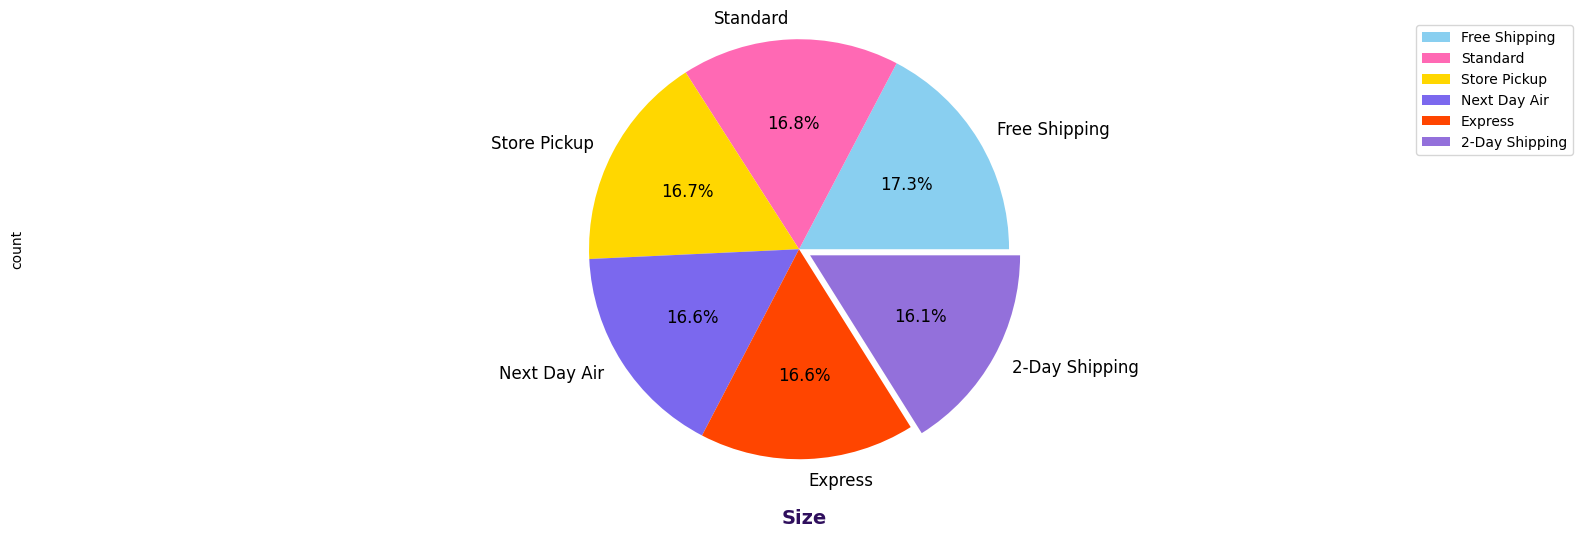

In [40]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Payment Methods

In [41]:
df["Payment Method"].value_counts()

,count
Payment Method,
PayPal,677
Credit Card,671
Cash,670
Debit Card,636
Venmo,634
Bank Transfer,612


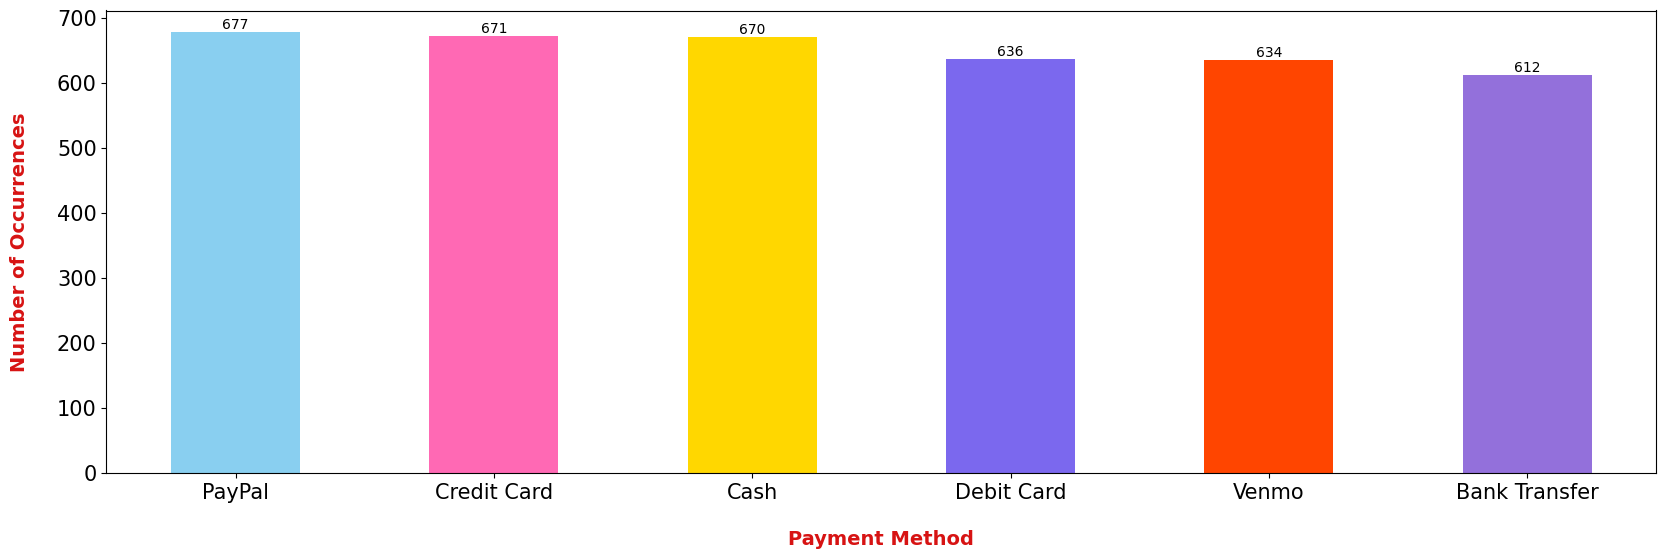

In [42]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('PayPal', 'Credit Card', 'Cash', 'Debit Card', 'Venmo', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

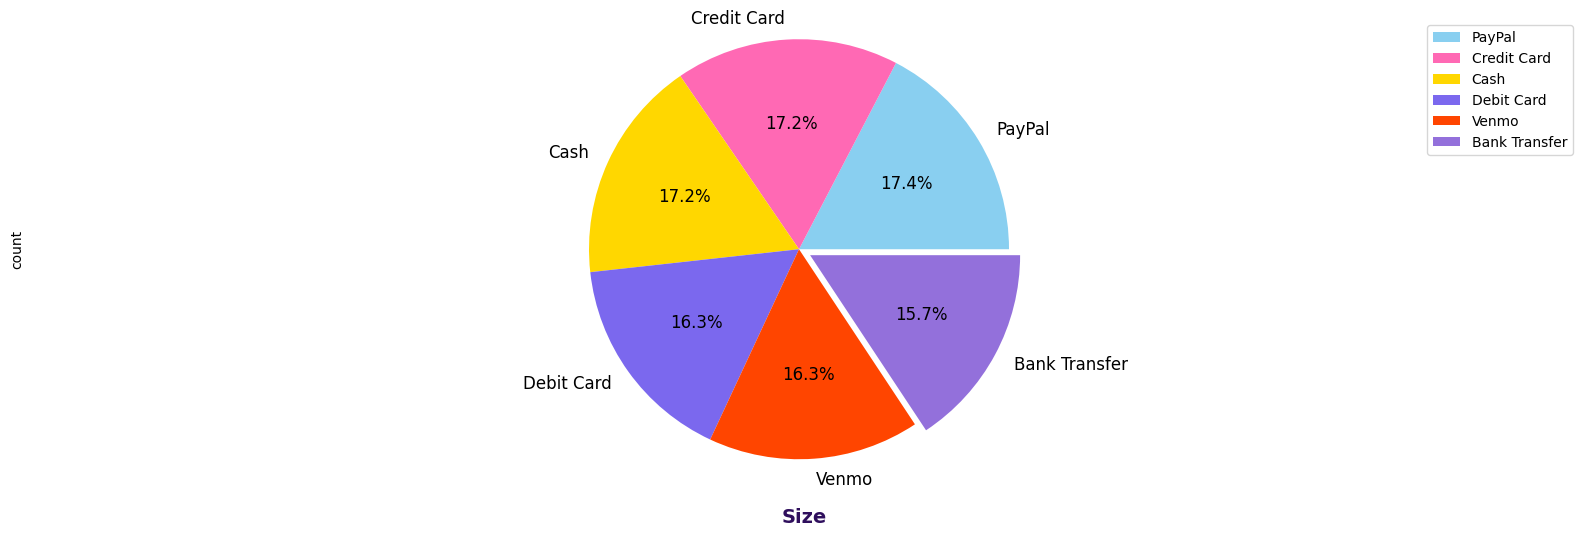

In [43]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Frequency of Purchases

In [44]:
df["Frequency of Purchases"].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


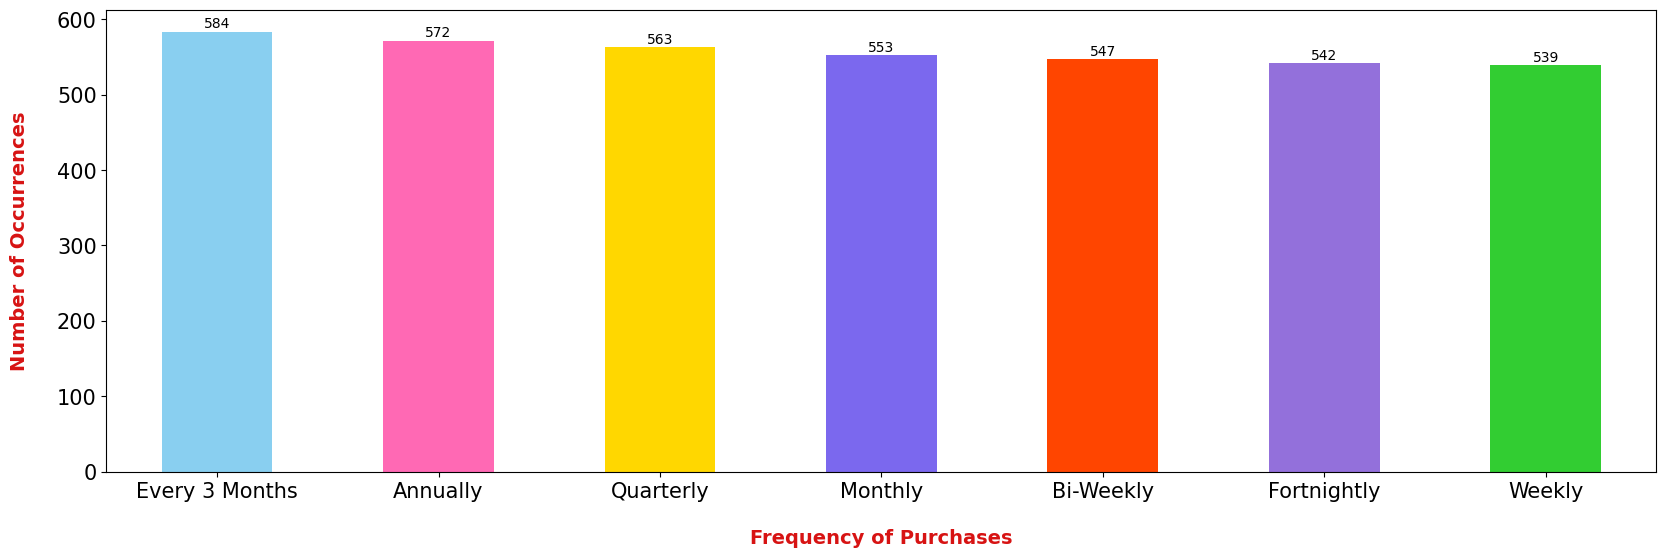

In [45]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

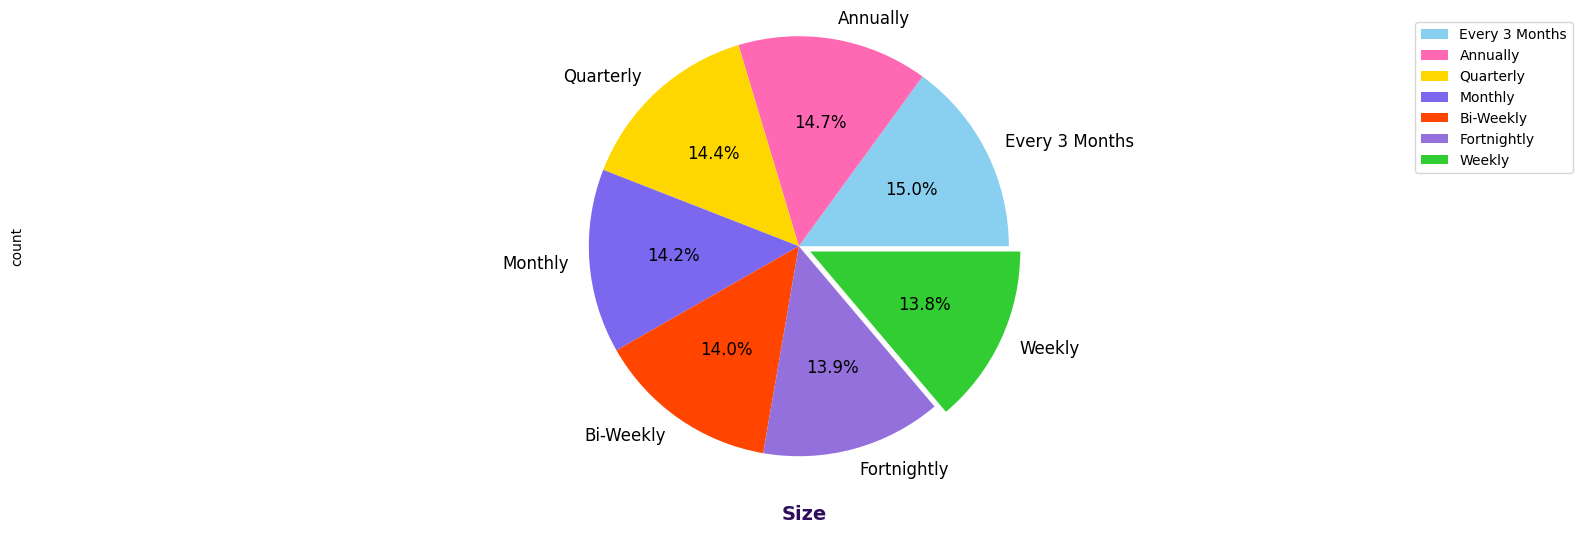

In [46]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

 average age of customers

In [48]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


most common item purchased ?

In [49]:
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


total purchase amount for each category

In [50]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


average review rating for male customers and female customers

In [51]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


most common payment method used by customers

In [52]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


median purchase amount

In [53]:
median_purchase_amount = df['Purchase Amount (USD)'].median()
print("Median Purchase Amount :", median_purchase_amount)

Median Purchase Amount : 60.0


customers have opted for the Subscription

In [54]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


Average purchase amount for customers with a subscription status

In [61]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


Most common season for purchases

In [56]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


Total purchase amount for each gender

In [59]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


Average age of customers who made purchases in the Summer season

In [62]:
average_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
print("Average Age of Customers in the Summer Season:", average_age_summer)

Average Age of Customers in the Summer Season: 43.973821989528794


Customers used a promo code for their purchase

In [63]:
promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of Customers who used Promo Code:", promo_code_count)

Number of Customers who used Promo Code: 1677


Maximum and minimum review rating

In [64]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


Most common shipping type for customers with a review rating above 4

In [65]:
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)

Most Common Shipping Type for High Review Ratings: Standard


Average purchase amount for customers who have made more than 20 previous purchase

In [66]:
avg_purchase_above_30_previous_purchases = df[df['Previous Purchases'] > 20]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with more than 20 Previous Purchases:", avg_purchase_above_30_previous_purchases)

Average Purchase Amount for Customers with more than 20 Previous Purchases: 59.697734074390766


Total purchase amount for customers with a 'Free Shipping' shipping type

In [67]:
total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for 'Free Shipping' Shipping Type:", total_purchase_free_shipping)

Total Purchase Amount for 'Free Shipping' Shipping Type: 40777


Average purchase amount for customers who used a discount

In [68]:
avg_purchase_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Discount Applied:", avg_purchase_with_discount)

Average Purchase Amount for Customers with Discount Applied: 59.27906976744186


Most common category of items purchased by female customers with a review rating below 3

In [69]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


Average age of customers who made purchases with a review rating above 4 and used a promo code

In [70]:
average_age_high_rating_promo = df[(df['Review Rating'] > 4) & (df['Promo Code Used'] == 'Yes')]['Age'].mean()
print("Average Age of Customers with High Review Ratings and Promo Code Used:", average_age_high_rating_promo)

Average Age of Customers with High Review Ratings and Promo Code Used: 43.9872


Frequency distribution of the 'Frequency of Purchases' column

In [71]:
purchase_frequency_distribution = df['Frequency of Purchases'].value_counts()
print("Frequency Distribution of Purchase Frequency:")
print(purchase_frequency_distribution)

Frequency Distribution of Purchase Frequency:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


Average purchase amount for each color of items

In [72]:
avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount by Color:")
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64


Purchase Amount by Season

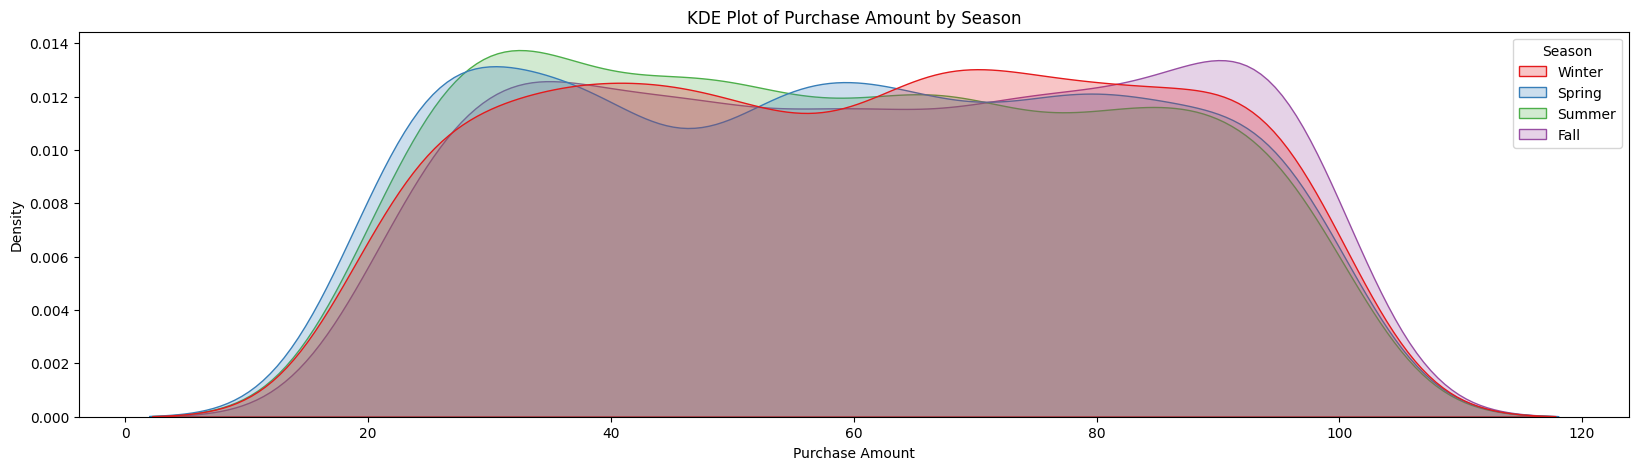

In [74]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount')
plt.show()

Customers have made a purchase in each category

In [75]:
purchase_count_by_category = df['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)

Purchase Count by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Total purchase amount for each size of clothing items (XL, L, M, S)

In [76]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


Customers have a subscription status of 'Yes' and used a promo code for their purchase

In [77]:
subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("Number of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

Number of Customers with Subscription and Promo Code Used:  1053


Age Distribution

In [ ]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Purchase Amount by Gender

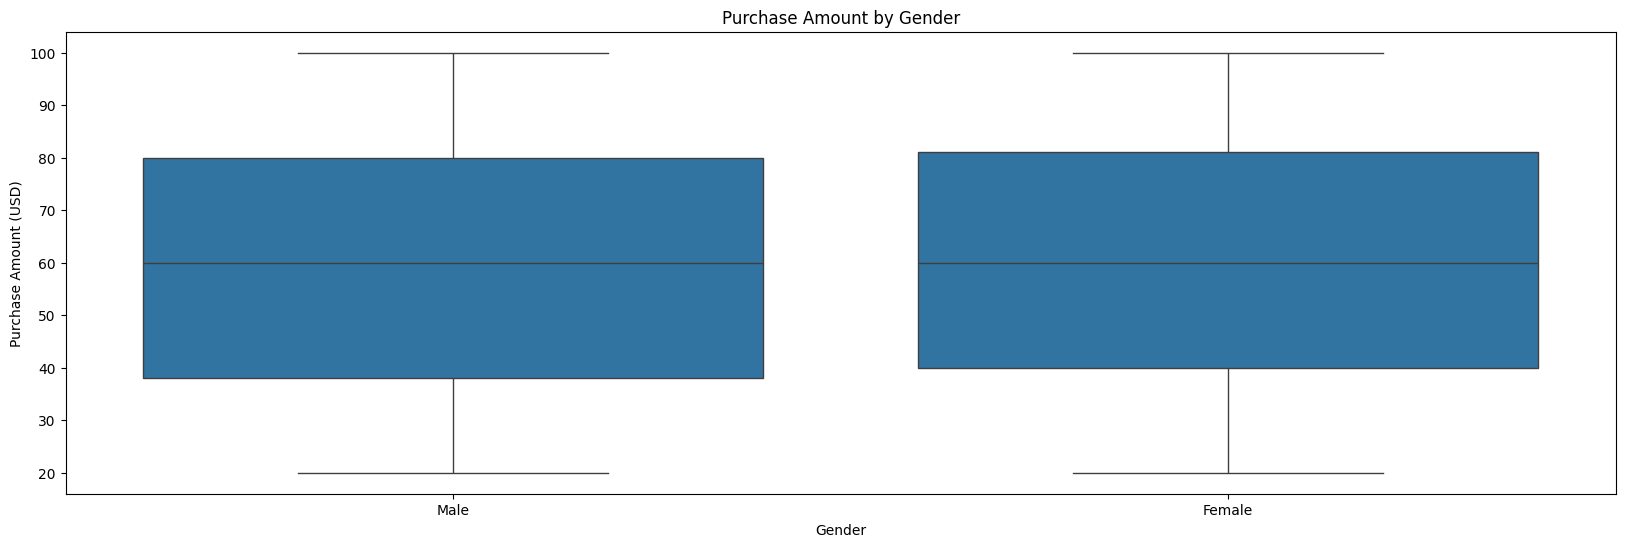

In [78]:
plt.figure(figsize = (20, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

Subscription Status by Gender

<Figure size 2000x600 with 0 Axes>

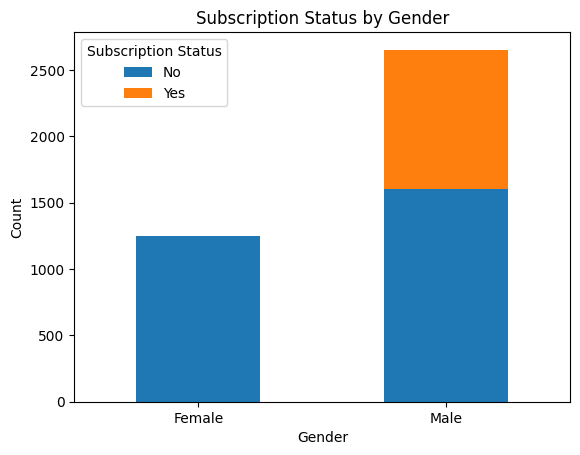

In [79]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

Review Rating by Category

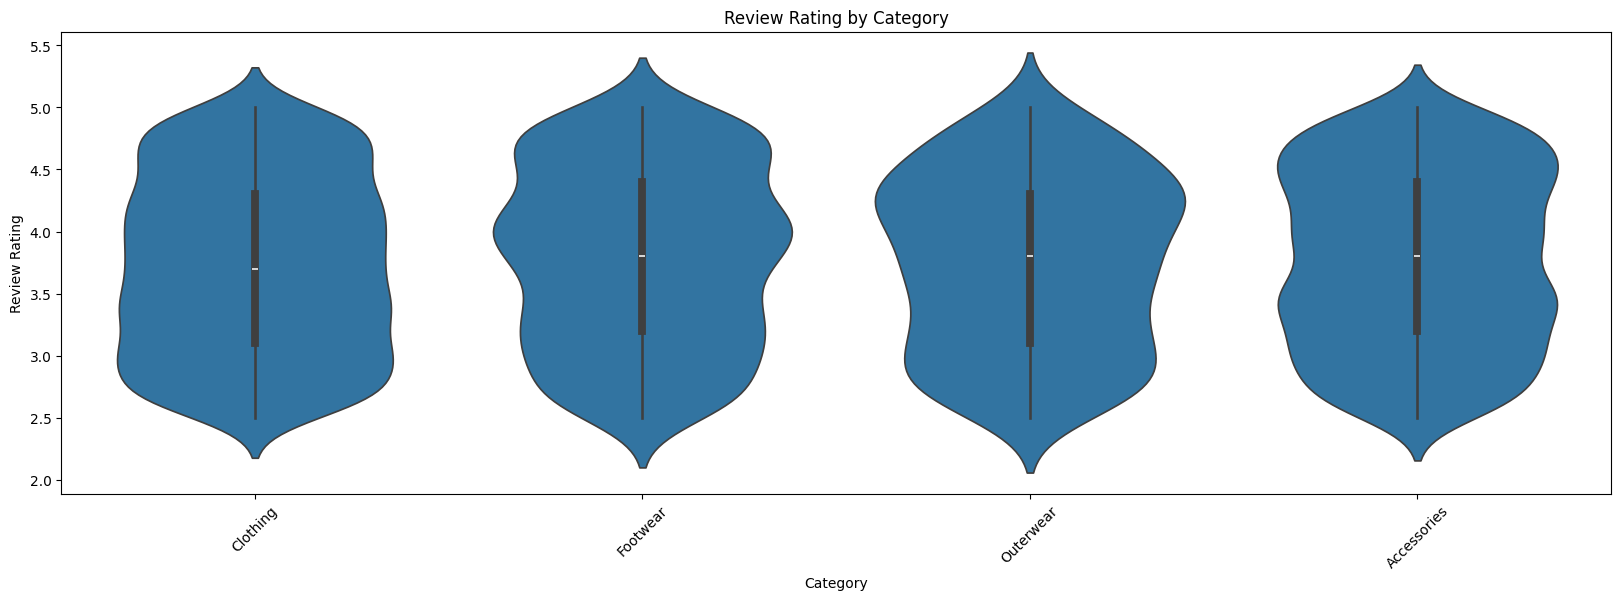

In [80]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()


Payment Method by Season

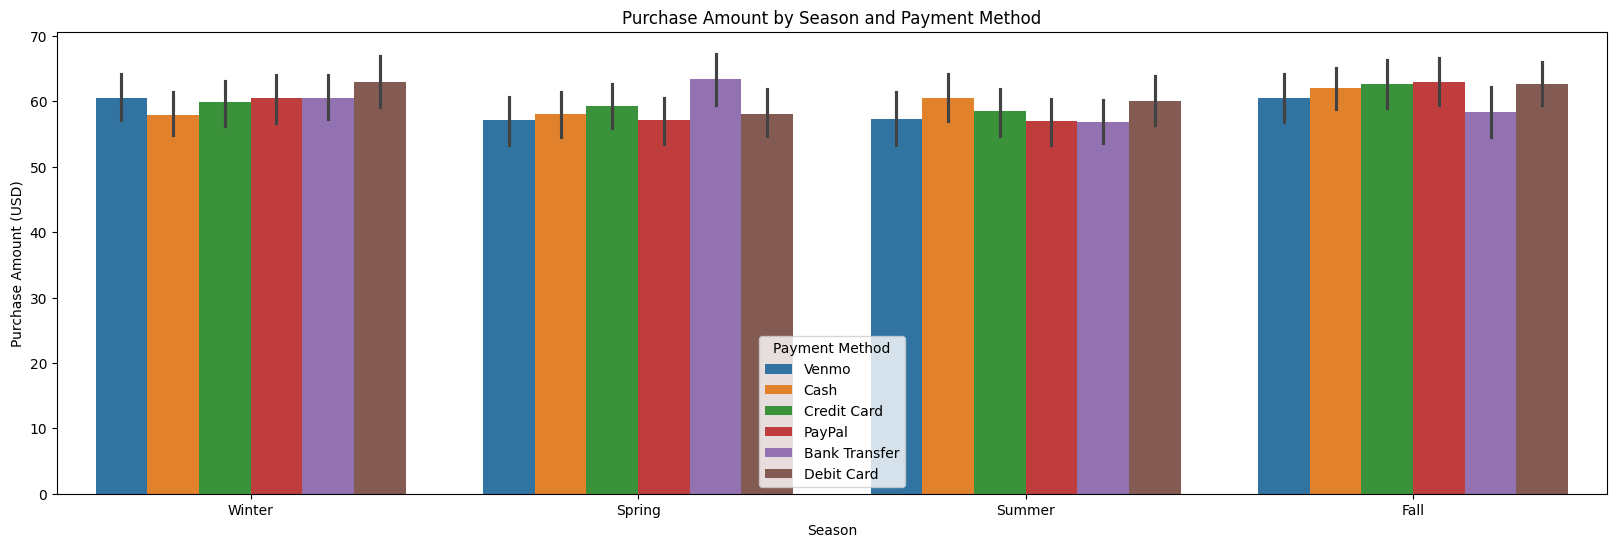

In [81]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

Hexbin Plot of Age vs. Purchase Amount

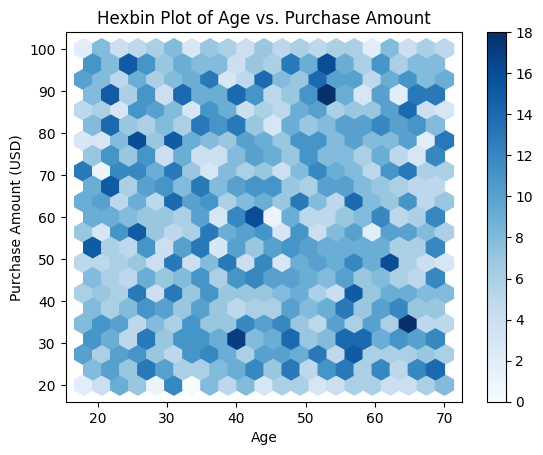

In [82]:
plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

Review Rating by Gender

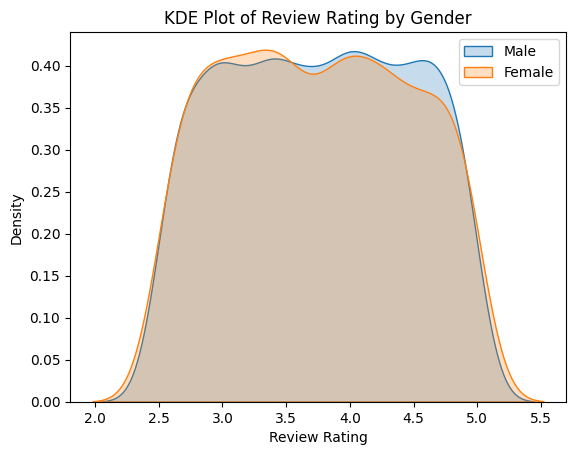

In [83]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()